In [1]:
import pandas as pd 
import numpy as np## 2. Data Loading

In [2]:
import warnings
warnings.filterwarnings('ignore')

## 1. Introduction & Objective

| Attribute                | Description                                                        |
|--------------------------|--------------------------------------------------------------------|
| Hours_Studied            | Number of hours spent studying per week.                           |
| Attendance               | Percentage of classes attended.                                    |
| Parental_Involvement     | Level of parental involvement in the student's education (Low, Medium, High). |
| Access_to_Resources      | Availability of educational resources (Low, Medium, High).         |
| Extracurricular_Activities | Participation in extracurricular activities (Yes, No).          |
| Sleep_Hours              | Average number of hours of sleep per night.                        |
| Previous_Scores          | Scores from previous exams.                                        |
| Motivation_Level         | Student's level of motivation (Low, Medium, High).                 |
| Internet_Access          | Availability of internet access (Yes, No).                         |
| Tutoring_Sessions        | Number of tutoring sessions attended per month.                    |
| Family_Income            | Family income level (Low, Medium, High).                           |
| Teacher_Quality          | Quality of the teachers (Low, Medium, High).                       |
| School_Type              | Type of school attended (Public, Private).                         |
| Peer_Influence           | Influence of peers on academic performance (Positive, Neutral, Negative). |
| Physical_Activity        | Average number of hours of physical activity per week.             |
| Learning_Disabilities    | Presence of learning disabilities (Yes, No).                       |
| Parental_Education_Level | Highest education level of parents (High School, College, Postgraduate). |
| Distance_from_Home       | Distance from home to school (Near, Moderate, Far).                 |
| Gender                   | Gender of the student (Male, Female).                              |
| Exam_Score               | Final exam score.                                                  |


## 2. Data Loading

In [3]:
df = pd.read_csv('/kaggle/input/student-performance-factors/StudentPerformanceFactors.csv')
df.head()

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [5]:
df.isna().sum()

Hours_Studied                  0
Attendance                     0
Parental_Involvement           0
Access_to_Resources            0
Extracurricular_Activities     0
Sleep_Hours                    0
Previous_Scores                0
Motivation_Level               0
Internet_Access                0
Tutoring_Sessions              0
Family_Income                  0
Teacher_Quality               78
School_Type                    0
Peer_Influence                 0
Physical_Activity              0
Learning_Disabilities          0
Parental_Education_Level      90
Distance_from_Home            67
Gender                         0
Exam_Score                     0
dtype: int64

In [6]:
df.duplicated().sum()

0

In [7]:
df.shape

(6607, 20)

In [8]:
df.dropna(inplace=True)
df.shape

(6378, 20)

In [9]:
df.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity,Exam_Score
count,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000,6378.000000
mean,19.977109,80.020853,7.034964,75.066165,1.495296,2.972719,67.252117
std,5.985460,11.550723,1.468033,14.400389,1.233984,1.028926,3.914217
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000,55.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000,65.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000,67.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000,69.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000,101.000000


In [10]:
numeric_columns = df.select_dtypes(include=['number']).columns
numeric_columns

Index(['Hours_Studied', 'Attendance', 'Sleep_Hours', 'Previous_Scores',
       'Tutoring_Sessions', 'Physical_Activity', 'Exam_Score'],
      dtype='object')

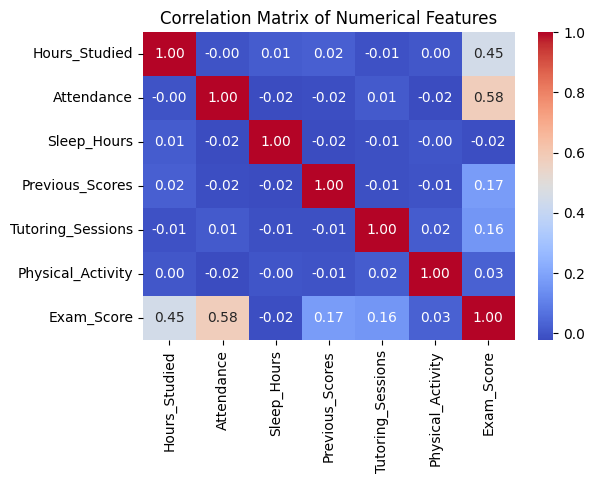

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()


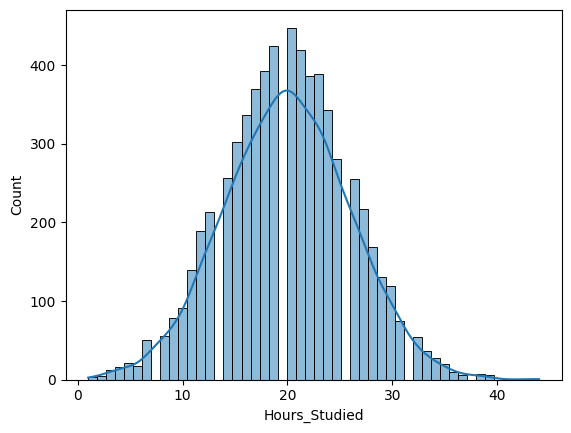

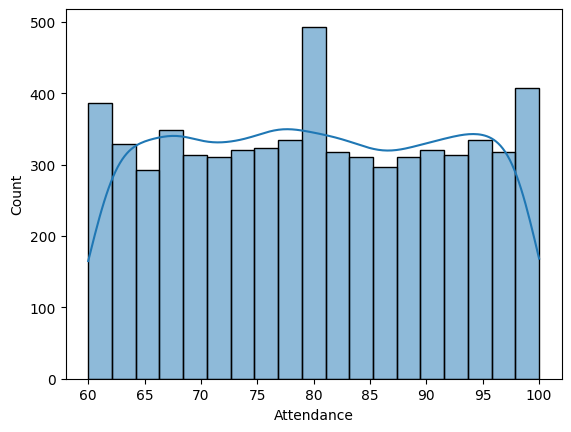

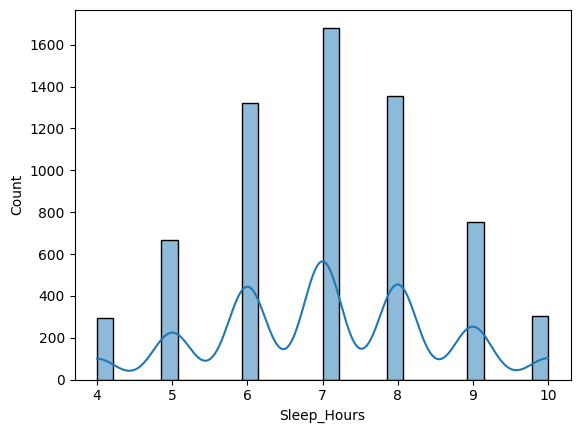

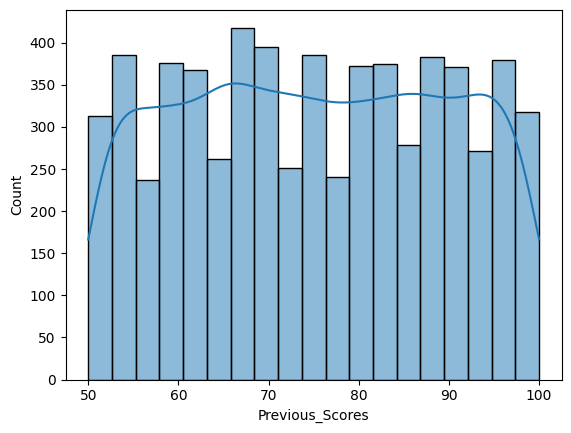

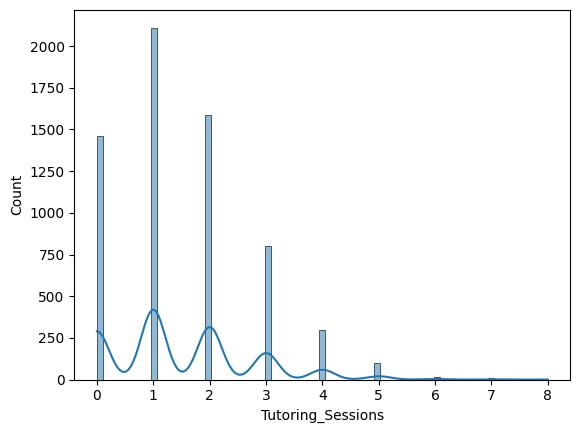

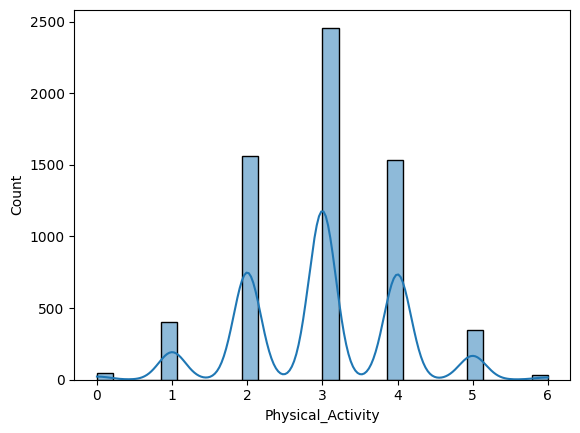

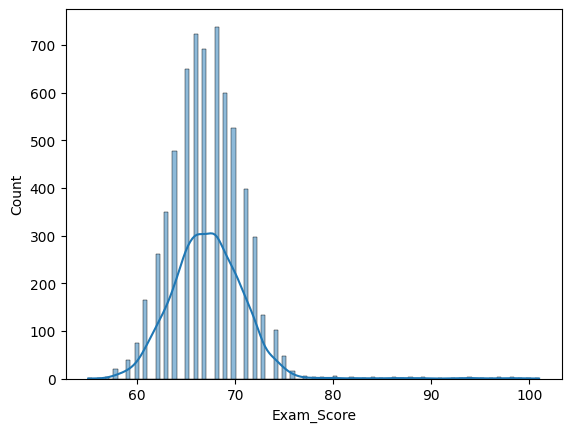

In [12]:
for col in df:
    if df[col].dtype != 'O':
        sns.histplot(df[col],kde=True)
        plt.show()

In [13]:
categorical_columns = df.select_dtypes(include=['object']).columns
for column in categorical_columns:
  print(df[column].unique())

['Low' 'Medium' 'High']
['High' 'Medium' 'Low']
['No' 'Yes']
['Low' 'Medium' 'High']
['Yes' 'No']
['Low' 'Medium' 'High']
['Medium' 'High' 'Low']
['Public' 'Private']
['Positive' 'Negative' 'Neutral']
['No' 'Yes']
['High School' 'College' 'Postgraduate']
['Near' 'Moderate' 'Far']
['Male' 'Female']


In [14]:
for column in categorical_columns:
  print("Column: ",df[column].value_counts())

Column:  Parental_Involvement
Medium    3251
High      1836
Low       1291
Name: count, dtype: int64
Column:  Access_to_Resources
Medium    3204
High      1900
Low       1274
Name: count, dtype: int64
Column:  Extracurricular_Activities
Yes    3807
No     2571
Name: count, dtype: int64
Column:  Motivation_Level
Medium    3237
Low       1864
High      1277
Name: count, dtype: int64
Column:  Internet_Access
Yes    5893
No      485
Name: count, dtype: int64
Column:  Family_Income
Low       2582
Medium    2566
High      1230
Name: count, dtype: int64
Column:  Teacher_Quality
Medium    3826
High      1905
Low        647
Name: count, dtype: int64
Column:  School_Type
Public     4434
Private    1944
Name: count, dtype: int64
Column:  Peer_Influence
Positive    2553
Neutral     2495
Negative    1330
Name: count, dtype: int64
Column:  Learning_Disabilities
No     5710
Yes     668
Name: count, dtype: int64
Column:  Parental_Education_Level
High School     3159
College         1939
Postgraduate  

## 3. Data Cleaning & Preprocessing

  * Encode Categorical cloumn
  * Remove Records with Wrong values in Exam_Score >100
  * Handel Outliers in Columns Hours_Studied andTutoring_Sessions
  * Split Data to train and test data

### Categorical Columns: Ordinal vs Nominal

- **Ordinal columns**: Categories have a natural order or ranking (e.g., Low < Medium < High).  
  Examples: `Parental_Involvement`, `Access_to_Resources`, `Motivation_Level`.

- **Nominal columns**: Categories have no inherent order; they are just labels.  
  Examples: `Gender`, `School_Type`, `Internet_Access`.

**Encoding Strategy:**  
- Use **Label Encoding** for **ordinal columns** to preserve order.  
- Use **One-Hot Encoding** for **nominal columns** to avoid false ranking.
**bold text**

In [15]:
from sklearn.preprocessing import LabelEncoder

# Ordinal columns: have a natural order (Low < Medium < High, etc.)
ordinal_columns = [
    'Parental_Involvement',      # Low < Medium < High
    'Access_to_Resources',       # Low < Medium < High
    'Motivation_Level',          # Low < Medium < High
    'Family_Income',             # Low < Medium < High
    'Teacher_Quality',           # Low < Medium < High
    'Parental_Education_Level',  # High School < College < Postgraduate
    'Distance_from_Home'         # Near < Moderate < Far
]

# Nominal columns: no natural order (categories are just names)
nominal_columns = [
    'Extracurricular_Activities',  # Yes, No
    'Internet_Access',             # Yes, No
    'School_Type',                 # Public, Private
    'Peer_Influence',              # Positive, Neutral, Negative
    'Learning_Disabilities',       # Yes, No
    'Gender'                       # Male, Female
]

df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

# Create a LabelEncoder object
label_encoder = LabelEncoder()
for column in ordinal_columns:
    df[column] = label_encoder.fit_transform(df[column])

df.head()



,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Sleep_Hours,Previous_Scores,Motivation_Level,Tutoring_Sessions,Family_Income,Teacher_Quality,...,Parental_Education_Level,Distance_from_Home,Exam_Score,Extracurricular_Activities_Yes,Internet_Access_Yes,School_Type_Public,Peer_Influence_Neutral,Peer_Influence_Positive,Learning_Disabilities_Yes,Gender_Male
0,23,84,1,0,7,73,1,0,1,2,...,1,2,67,False,True,True,False,True,False,True
1,19,64,1,2,8,59,1,2,2,2,...,0,1,61,False,True,True,False,False,False,False
2,24,98,2,2,7,91,2,2,2,2,...,2,2,74,True,True,True,True,False,False,True
3,29,89,1,2,8,98,2,1,2,2,...,1,1,71,True,True,True,False,False,False,True
4,19,92,2,2,6,65,2,3,2,0,...,0,2,70,True,True,True,True,False,False,False


In [16]:
df.shape

(6378, 21)

In [17]:
df = df[df['Exam_Score']<=100]
df.shape

(6377, 21)

### Outlier Detection: Why Z-Score?

Since the data is **normally distributed**, we use **Z-Score** to detect outliers.

- **Z-Score** measures how many standard deviations a data point is from the mean
- A common rule: **|Z| > 3** → Outlier.
- **Why not IQR?**
  - IQR is better for skewed data because it relies on median and quartiles.
  - For normal data, Z-Score is more accurate as it directly uses mean and standard deviation.


In [18]:
# Removing outliers from dataset based on the Z-score method

z = np.abs((df - df.mean()) / df.std())
threshold = 3
df= df[(z < threshold).all(axis=1)]

In [19]:
X = df.drop("Exam_Score", axis=1)
y = df["Exam_Score"]


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


## 4. Model Training

### **LinearRegression**

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
model= LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [22]:
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"{model.__class__.__name__}:")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

LinearRegression:
MAE: 0.92
R-squared: 0.88


### **PolynomialRegression**




In [23]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_features = PolynomialFeatures(degree=2,include_bias=False)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

In [24]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

LinearRegression()

In [25]:
X_train_poly.shape

(4641, 230)

In [26]:
y_pred = model.predict(X_test_poly)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("PolynomialRegression")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

PolynomialRegression
MAE: 0.27
R-squared: 0.99


In [27]:
y_train_pred = model.predict(X_train_poly)
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print("PolynomialRegression (Training Data):")
print(f"MAE: {mae_train:.2f}")
print(f"R-squared: {r2_train:.2f}")

print("\nPolynomialRegression (Test Data):")
print(f"MAE: {mae:.2f}")
print(f"R-squared: {r2:.2f}")

PolynomialRegression (Training Data):
MAE: 0.27
R-squared: 0.99

PolynomialRegression (Test Data):
MAE: 0.27
R-squared: 0.99
